## Learn how to code a simple two-layer neural network with a sigmoid activation function and zero bias

Import necessary libraries

In [1]:
import numpy
from numpy import random
from matplotlib import pyplot
%matplotlib inline

Remind myself how matrix multiplication works

In [2]:
a = numpy.ones( ( 4, 3 ) )
b = numpy.ones( ( 3, 4 ) )
c = a@b
print( c.shape )
d = numpy.ones( ( 4, 1 ) )
e = c@d
print( e.shape )

(4, 4)
(4, 1)


Define activation function: sigmoid function

$$ \sigma = \frac{1}{1 + e ^{-x}} $$

In [3]:
def sigmoid( data ):
    
    s = 1 / ( 1 + numpy.exp( -data ) )
    
    return s

#### Create a Neural Network class

$$ Layer 1 = \sigma ( Weight1 * x ) $$ 

$$ Output = \sigma ( Weight2 * Layer 1 ) $$

Loss function: sum of squares error

$$ Loss = \sum_{n=1}^{i} ( y - \hat{y} )^{2} $$ 

Gradient descent for back propogation using chain rule:

$$ \frac{\delta Loss}{\delta Weight_i} = \frac{\delta Loss}{\delta \hat{y}} * \frac{\delta \hat{y}}{\delta z} * \frac{\delta z}{\delta Weight_i} $$ 

Define derivate of sigmoid function:

In [4]:
def dsigmoid( data ):
    
    ds = data * ( 1 - data )
    
    return ds

In [5]:
class NeuralNetwork:
    
    def  __init__( self, x, y ):
        
        self.input = x
        self.weight1 = random.rand( self.input.shape[ 1 ], self.input.shape[ 0 ] )
        self.weight2 = random.rand( self.weight1.shape[ 1 ], 1 )
        self.y = y
#         self.output = numpy.zeros_like( y )
    
    def feed_forward( self, xi ):
        
        self.layer1 = sigmoid( xi @ self.weight1 )
        self.output = sigmoid( self.layer1 @ self.weight2 )
    
    def back_propogation( self ):
        
        step = 1
        self.loss = self.y - self.output
        dLoss_dWeight2 = self.layer1.T @ ( 2 * self.loss * dsigmoid( self.output ) )
        dLoss_dWeight1 = self.input.T @ ( ( ( 2 * self.loss * dsigmoid( self.output ) ) @ self.weight2.T ) * dsigmoid( self.layer1 ) )
        self.weight1 += step * dLoss_dWeight1
        self.weight2 += step * dLoss_dWeight2
        
    def train( self ):

        self.feed_forward( self.input )
        self.back_propogation()
        
    def test( self, test_x ):
        
        self.feed_forward( test_x )
        
        return self.output

Train neural network

In [6]:
x = numpy.array( ( [ 0, 0, 1 ], [ 0, 1, 1 ], [ 1, 0, 1 ], [ 1, 1, 1 ] ), dtype = float )
y = numpy.array( ( [ 0 ], [ 1 ], [ 1 ], [ 0 ] ), dtype = float )

brain = NeuralNetwork( x, y )
ites = 1000
hist = numpy.empty( ( len( y ), ites ) )
loss = numpy.empty( ( len( y ), ites ) )
for i in range( ites ):
        
    brain.train()
    hist[ :, i ] = brain.output.T
    loss[ :, i ] = brain.loss.T
    
print( 'NN =', brain.output, '\nideal =', y, '\ndiff =', abs( y - brain.output ) )

NN = [[0.01432831]
 [0.96060282]
 [0.96210935]
 [0.04755565]] 
ideal = [[0.]
 [1.]
 [1.]
 [0.]] 
diff = [[0.01432831]
 [0.03939718]
 [0.03789065]
 [0.04755565]]


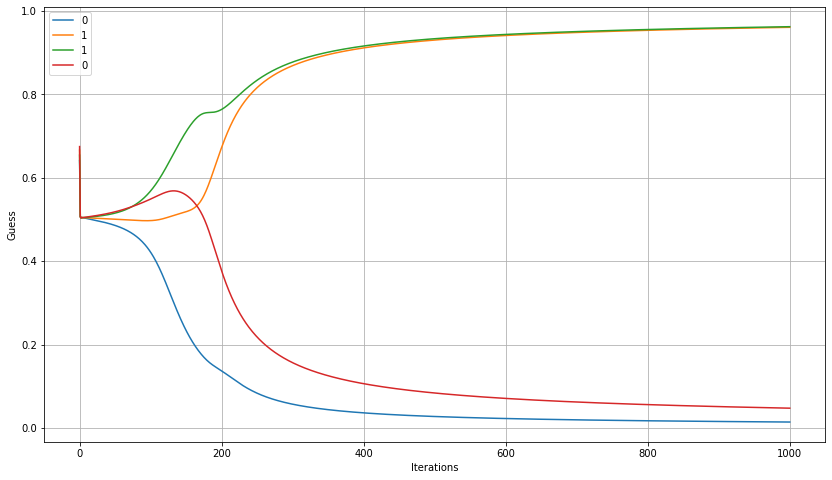

In [7]:
iters = numpy.linspace( 0, ites, ites )
label = [ '0', '1', '1', '0' ]
pyplot.figure( figsize = ( 14, 8 ) )
for i in range( hist.shape[ 0 ] ):
    pyplot.plot( iters, hist[ i, : ], label = label[ i ] )
pyplot.grid()
pyplot.legend()
pyplot.xlabel( 'Iterations' )
pyplot.ylabel( 'Guess' );

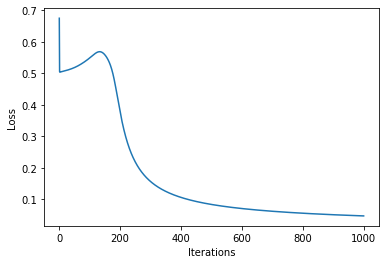

In [8]:
pyplot.plot( iters, abs( loss[ 3, : ] ) );
pyplot.ylabel( 'Loss' )
pyplot.xlabel( 'Iterations' );

In [9]:
# import pandas
# test_x = pandas.read_csv( '500_Person_Gender_Height_Weight_Index.csv' )
# test_x = test_x.replace( 'Male', 0 )
# test_x = test_x.replace( 'Female', 1 )
# del test_x['Index']
# test_y = test_x.iloc[ :, 0 ]
# del test_x[ 'Gender' ]
# train_x = test_x.to_numpy( dtype = float )
# test_y = test_y.to_numpy( dtype = float )
# train_y = numpy.empty( ( 500, 1) )
# for i in range( len( train_y ) ):
#     train_y[ i ] = [ test_y[ i ] ]

# tx = numpy.empty( ( train_x.shape[ 0 ], train_x.shape[ 1 ] ) )
# # tx[ :, 0 ] = train_x[ :, 0 ] / numpy.max( train_x[ :, 0 ] )
# # tx[ :, 1 ] = train_x[ :, 1 ] / numpy.max( train_x[ :, 1 ] )
# tx[ :, 0 ] = ( train_x[ :, 0 ] - numpy.mean( train_x[ :, 0 ] ) )
# tx[ :, 1 ] = ( train_x[ :, 1 ] - numpy.mean( train_x[ :, 1 ] ) )

In [10]:
# genderNN = NeuralNetwork( tx, train_y )
# ites = 1000
# hist = numpy.empty( ( len( train_y ), ites ) )
# loss = numpy.empty( ( len( train_y ), ites ) )
# for i in range( ites ):
        
#     genderNN.train()
# #     hist[ :, i ] = genderNN.output.T
#     loss[ :, i ] = genderNN.loss.T

In [11]:
# iters = numpy.linspace( 0, ites, ites )
# pyplot.plot( iters, abs( loss[ 9, : ] ) );

## Questions:

Why does the model not predict well when the input is much different than the correct output? (i.e. when the input is ( 0, 2, 100 ) and the correct output is 1)